## P2 - Analyzing the NYC Subway Dataset
_Author: Ly Vinh Hung_

##  1. Statistical Test

___1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?___
> The Mann-Whitney U test (also known as Wilcoxon rank­sum test) is used in this situation to analyze NYC subway data. Since we do not know whether our population is normally distributed and whether one distribution is more likely to generate a higher/smalller value than the other, thus we cannot use traditional 2-sided t-test but only Mann-Whitney U 2-tailed test. 
> The null hypothesis is two population (rain vs non-rain ridership) is similar, and rain has no influence over ridership. p-critical value would be 0.05


___1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.___
> As briefly discussed above, we use Mann-Whitney, a non-parametric test since we cannot assume the data is displayed as a bell-curve. In fact, as we went along problem set 2-4, specifically data visualisation task, we understood that our data is right-skewed, long tail. Therefore, normal traditional t-test is not an option.  

___1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.___


Results of the Mann-Whitney U test can be referred to __problem set 3.3 [def mann_whitney_plus_means(turnstile_weather)]__

|Measurement |Numerical value
|------              |------|
|"With-rain" mean    |_1,105.45_  |
|"Without-rain" mean |_1,090.28_  |
|U-statistic         |_1,924,409,167_  |
|two-tailed p-value             |_0.04999982_  |


___1.4 What is the significance and interpretation of these results?___
> On the outset, it seems like there is almost no diffeence between mean of "with-rain" ridership and "without-rain" ridership, only 1.39% increase. But if we look closely at p-value of 0.0499 < p-critical value of 0.05, we now can systematically conclude that we are 95% confidence to reject the null hypothesis. In plain term, there is a significant difference between ridership on rainy day and non-rainy day.

## 2. Linear Regression

__**2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model**__
> After multiple attempt using 2 main approach: OLS and Gradient Descent and look at the r-squared result. I have decided to approach linear regression model with Ordinary Least Squared, using Statmodels to predict ENTRIEs_hourly in my model. Although Statmodels seems to have slower run-time than SGDRegressor, it produced much significant accuracy.

___2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?___


|Name | Input variable
|------              |------|
|Hour    |_Feature_  |
|rain |_Feature_  |
|fog         |_Feature_  |
|meantempi             |_Feature_  |
|Unit             |_Dummy_  |


___2.3 Why did you select these features in your model?___
+ Hour: intuitively speaking, "rush hour" and "non-rush hour"would be a good indicative of Hourly Entries
+ Rain: As we did in the first session, there is a significant difference between rain and non-rain ridership. Therefore, this variable is also need to taken into consideration.
+ Fog & Meantempi: these 2 variables are used since I took the approach of adding each variable one-by-one until I get the maximum r-squared and after multiple iteration, these 2 variable helps the model improve r-squared by 0.03 
+ Unit: I took this as dummy variable since it is intuitively to have a heavy-traffic UNIT (subway stop) in highly-densed populated area and less traffic in rural/city outskirt unit. It would not create a reliable model to put this as a quanlitative main features


___2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?___




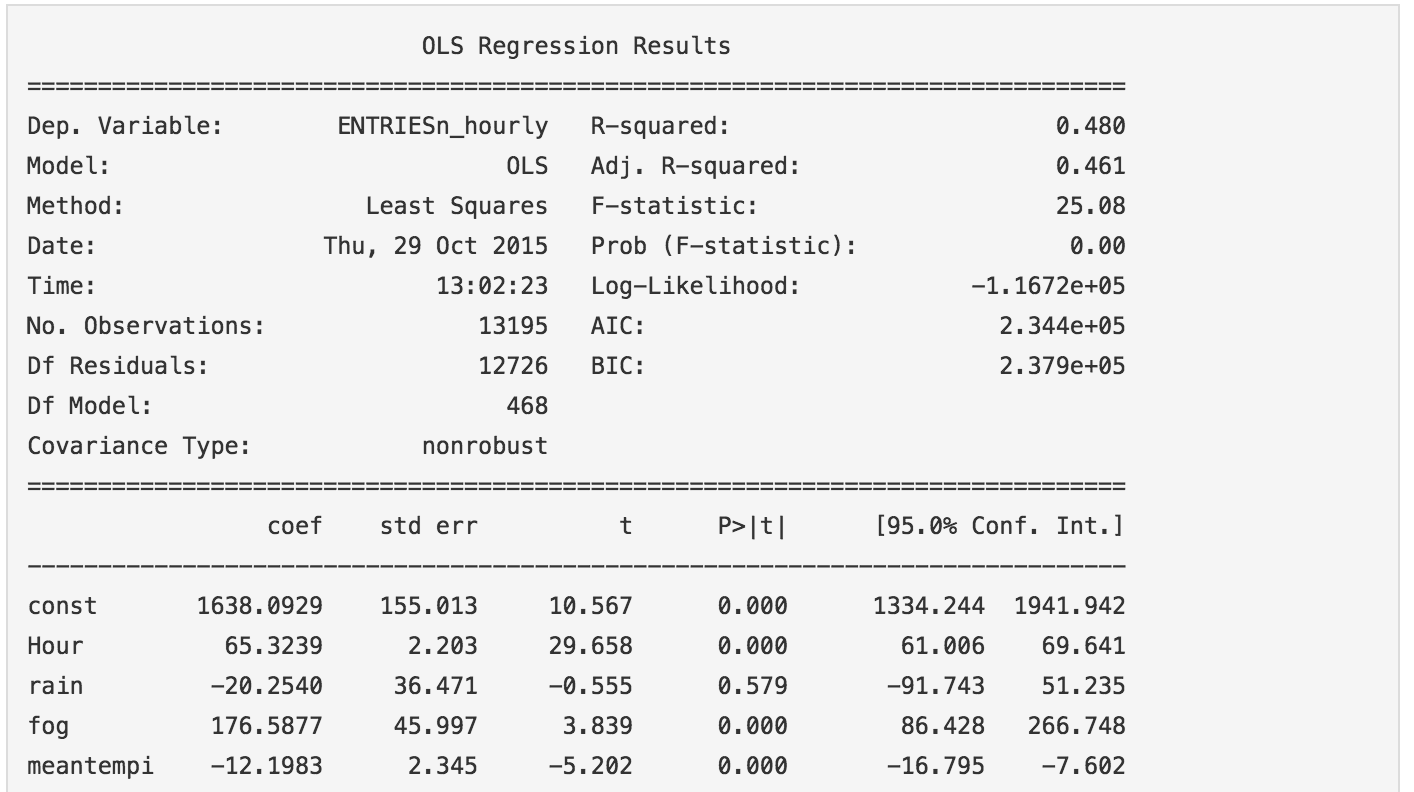

In [17]:
from IPython.display import Image
Image(filename='/Users/tommyly/Documents/Udacity/OLS Results.png')

___2.5 What is your model’s R2 (coefficients of determination) value?___
> As shown in the picture above, R-squared for the moel is at 0.48


___2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?___

>R-squared is a quantitative term for the "goodness of fit". In other word, only 48% of the variation of ENTRIEsn_hourly can be explained by these features combination. This clearly does not show a strong linear relationship with the variable selected. However, we can use the residual histogram, that is, the difference between the original hourly entry data and the predicted values.


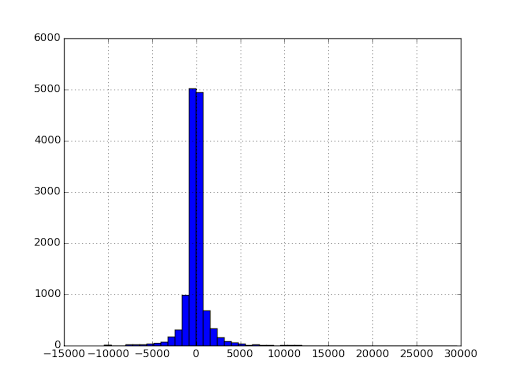

In [7]:
from IPython.display import Image
Image(filename='/Users/tommyly/Documents/Udacity/residual histogram.png')

> To judge whether this linear model is appropriate or not would be strongly based on the goal of the end-user. If the goal is clearly need an exact numbers and little margin for error (e.g human resource allocation per station, build new kiosk/check-point per station, utilities allocation,etc.) then this model is clearly not enough. However, if the main goal is to have an overall view of what the ridership might look like, or nice-to-know information, then this model is sufficient for the goal. Also, the histogram of the residuals has long tails, which suggests that there are some very large residuals and the distribution is not normal so there are potentially some structures left in the data that our model has not really captured.

> We can actually use feature-engineering to group ridership into block of hour (e.g 8-10am, 10-12am, 12-2pm, etc.) This will definitely yield a better result and prediction.

## 3. Visualization

___3.1 Ridership in Rainy Day vs Non-Rainy Day___

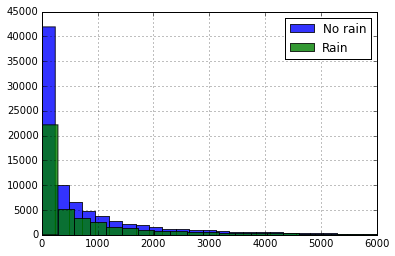

In [8]:
from IPython.display import Image
Image(filename='/Users/tommyly/Documents/Udacity/rain_ridership.png')

> It is very clear to see both no-rain and rain ridership are long-tail right-skewed distribution, rather than normally distributed, which support the decision to use Mann-Whitney U test rather than normal t-test. Although there seems to be less ridership in rainy day, it is very misleading to conclude people use NYC subway more on non-rainy day. As I have checked the NYC normal weather data, there are of course less rainy day than rainy one. Therefore, this graph seems to reflect more on NYC weather more than the significant diffrence between those.

___3.2 Ridership by time of day___


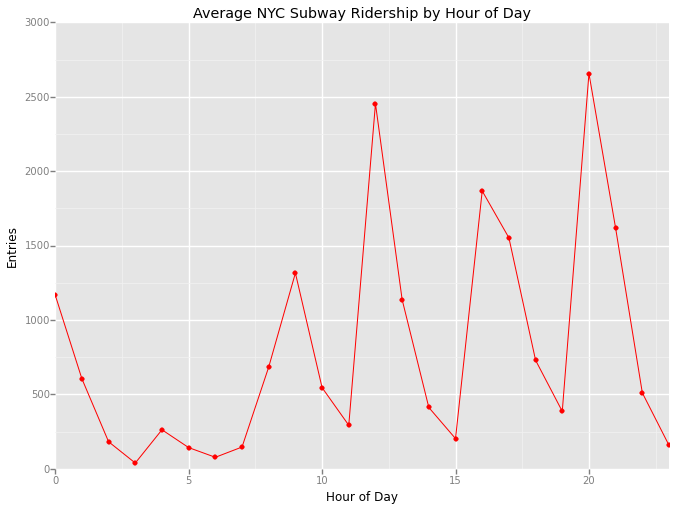

In [19]:
from IPython.display import Image
Image(filename='/Users/tommyly/Documents/Udacity/p2/Images/time_of_day_line.png')

> This chart seems to be really interesting since usually people must have gone to subway before working hour and after working hour. However, this chart indicate otherwise, subway ridership is at peak at 11am and 20pm. It could be possible that people use subway to go for lunch and dinner while using thei personal cars or buses to commute within the city.

> Another strong implication is this graph also explained our low R-squared although Hour of Day should be a strong indicative of Subway Entries as there is no strong linear relationship between these 2 variables.

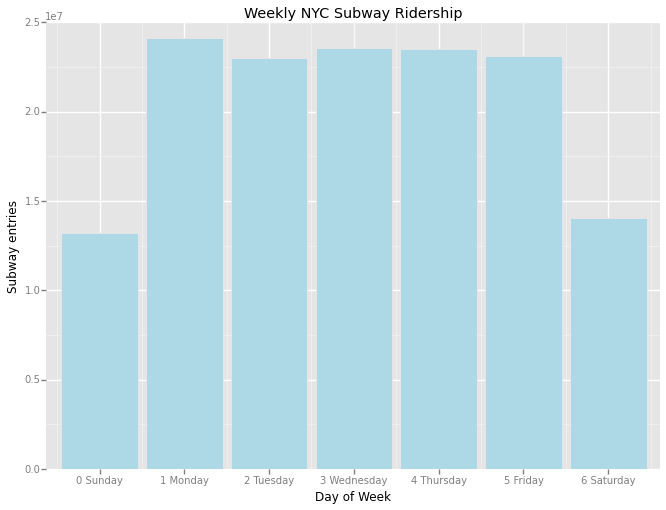

In [15]:
from IPython.display import Image
Image(filename='/Users/tommyly/Documents/Udacity/day_of_week.png')

> There is not much interpretation from this graph, it is expected that Saturday and Sunday would have less ridership than normal working day. Also, it seems like there is no strong fluctuation between working day (except there's a slight decrease of ridership on Tuesday). This graph only shows a normal work day looks like in NYC

## 4. Conclusion

___4.1 From your analysis and interpretation of the data, do more people ride
the NYC subway when it is raining or when it is not raining?__
> Based on our Mann-Whitney U analysis of p-value of 0.0499 < p-critical value of 0.05, we can be 95% highly confidence that there is **more people riding on NYC subway system on rainy days than non-rainy day**. Although the graph in question 3.2 and the mean difference (1.4% difference) could potentially mislead us from the outset, based on Mann-Whitney U, we have sufficient evidence to draw our conclusion.


___4.2 What analyses lead you to this conclusion? You should use results from both your statistical
tests and your linear regression to support your analysis.__
> Based on statistical test, we can see our p-value is falling under the p-critical value as stated in question 4.1. Therefore, we can conclude to reject the null hypothesis ( no difference between rain and non-rainy day). Also based on our linear regression, after adding the presence of "rain" variable, our R-squared did **slightly increase**, although the increasing is not big enough to say that rain has extremely large impact on ridership. If it truly makes impact, the R-squared must be at least double than the current R-squared. However, let's also taking into consideration that there must be less rainy day than non-rainy day, thus the data might not look at the overall big picture.

## 5. Reflection

___5.1 Potential shortcomings of the methods of the analysis
Analysis, such as the linear regression model or statistical test.___
> + **Dataset shortcoming**: a major shortcoming is from the lack of overall picture of NYC Subway dataset, which means the daat only show the month of May, 2011. Perhaps the month of May is the model month for a whole year, but there is highly likely there are lots of incident/community events (baseball/basketball games)/weather that makes May a special month. It is expected that if we apply this model to a dataset consist of 1-year data, the result might be worsen. 
+ **Linear regression shortcoming**: although the variables are quite comprehensive, we can do few feature-engineering technique to make the model more robust. For example, as we already understand that "Hour" is in fact the main indicative to predict our model although it is not quite having a linear relationship. We can create new variable called "Hour Group", a very common technique to group datetime variable (e.g 8-10am, 10-12am, 12-2pm, etc.). This will surely increse our model accuracy by a significant amount.
+ ** Statistical test**: a bigger sample size would be much better for the statistical test, we can do a whole 4-month season or a whole year instead of just 1 year, which could affect the Mann-Whitney U accuracy. Also, the statistical test only takes rain and non-rain into consideration regardless of the station unit. While it's true ridership is influent by rain, it is also true that ridership in certain stations may just be naturally large due to populated area, regardless of the weather influence(for example: Grand Central). If we can somehow exclude these factors by normalizing our data, then the statistical test would yield much more accuracy.


## 6. References

1. [**MITx Analytics Edge** ](https://www.edx.org/course/analytics-edge-mitx-15-071x-0)
2. [**Kaggle Scikit-learn tutorial** ](http://blog.kaggle.com/tag/scikit-learn-tutorial-series/)
3. [**Udacity Mann-Whitney U Webcast** ](https://discussions.udacity.com/t/webcast-understanding-the-mann-whitney-u-test/25646)
4. [**ggplot from y hat**](http://ggplot.yhathq.com/)